In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('final.csv')
df.head()

,Visitor-Points,Home-Points,Overtime,Age_Visitor,W_Visitor,L_Visitor,PW_Visitor,PL_Visitor,MOV_Visitor,SOS_Visitor,...,T_DRB_Home,T_TRB_Home,T_AST_Home,T_STL_Home,T_BLK_Home,T_TOV_Home,T_PF_Home,T_PTS_Home,elo_diff,score_gap_sign
0,91,93,0,25.4,25,57,28,54,-4.46,-0.51,...,32.4,42.0,21.0,7.7,4.3,14.9,20.5,96.5,-33.249042,2
1,103,117,0,26.0,36,46,35,47,-2.15,0.75,...,31.7,43.0,19.1,8.4,4.6,15.3,21.9,105.2,34.878124,14
2,82,110,0,24.7,15,67,20,62,-8.18,-0.23,...,34.0,43.3,25.2,7.4,5.1,14.4,18.2,105.4,303.949571,28
3,112,106,0,26.8,27,55,25,57,-6.29,0.96,...,31.1,42.5,21.2,7.0,4.2,14.1,23.0,101.3,88.639727,-6
4,114,121,0,30.6,54,28,54,28,4.76,-0.61,...,31.3,40.0,24.9,8.3,4.0,15.3,19.2,101.0,-87.770788,7


In [2]:
x = df.loc[:,'Visitor-Points':'elo_diff'].values
x.shape

(5967, 136)

In [3]:
y = df.loc[:,['score_gap_sign']].values

In [4]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=1/7.0, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(.90)
pca.fit(train_x)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
train_x = pca.transform(train_x)
test_x = pca.transform(test_x)

In [8]:
import glob, os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
linreg = LinearRegression()
linreg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
pred = linreg.predict(test_x)
error = np.sqrt(mean_squared_error(test_y, pred))
print(error)

12.14770259853811


In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
df = pd.read_csv('final.csv')
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=1/7.0, random_state=0)

In [13]:
train_y = train_y.ravel()
test_y = test_y.ravel()

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
rfreg = RandomForestRegressor(n_estimators=100, max_depth=25, 
                              min_samples_split=2, min_samples_leaf=3, 
                              random_state=0)

In [16]:
feature_range = list(range(10,31))
param_grid = dict(max_features=feature_range)

In [17]:
# grid = GridSearchCV(rfreg, param_grid, cv=10, return_train_score=False, n_jobs = -1)
# grid.fit(train_x, train_y)

In [18]:
# print(grid.best_score_)
# print(grid.best_params_)
# print(grid.best_estimator_)

In [19]:
rfreg_best = RandomForestRegressor(n_estimators=100, max_features=30, 
                              min_samples_split=2, min_samples_leaf=3, 
                              random_state=0)
rfreg_best.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=30, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [20]:
prediction_randomfroest = rfreg_best.predict(test_x)
error = np.sqrt(mean_squared_error(test_y, prediction_randomfroest))
print(error)

5.105786302864555


In [23]:
# out-of-sample prediction
out_of_sample = pd.read_csv('Out_of_Sample.csv')
X_out = out_of_sample.drop(['score_gap_sign'], axis = 1)
y_out = out_of_sample['score_gap_sign']
rfreg_best.fit(x,y)
pred = rfreg_best.predict(X_out)
error = np.sqrt(mean_squared_error(y_out, pred))
print(pred)
print(error)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[ 16.7525974   12.19489863  -2.63885043   3.88007576  -5.60109416
  24.4348373   -9.1704311   10.1492248    1.95381097  14.36340188
  -5.29306025   7.52021542  11.57726335  14.29997328   4.50739863
   0.19487518   3.82797619  15.46152128   5.67303896  14.57872655
   4.70152706   1.74054545 -21.58981602  10.5687417   -2.22991342
  -1.37747439  -1.54567657  24.57331349  11.26032792  -2.4022543
  -0.40251046  -5.90919048   3.97329113  10.00838131  -7.54973743
  -4.73704593   1.26683874   4.52406313  -0.38425866   4.22034554
   4.59889069  17.93452381  -0.51246465   9.23775722   6.90690723
   6.09126617  12.66640657  -1.25656272   8.53558802  -2.93013831
   6.05569766   5.90068984  -1.55722872 -10.09806349  12.75764863
  -7.09493434  20.30384707  10.39793939  -8.58508442   4.92128968
 -14.48778139  10.10620455   5.77003427   2.74025419  -4.39133622
 -10.05900114  18.87146245  -4.85779263 -20.47500397   3.47788889
 -17.51579618   6.3947316    9.43442208  -7.72691667  -8.22155123
 -15.759259

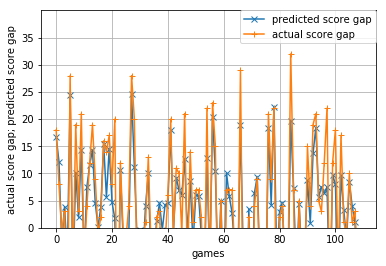

In [26]:
# Visulization of prediction 
import matplotlib.pyplot as plt
pred_list = list(pred)
y_out_list = list(y_out)
fig, ax = plt.subplots()
plt.xlabel('games')
plt.ylabel('actual score gap; predicted score gap')
yticks = range(0,40,5)
ax.set_yticks(yticks)
ax.set_ylim([0,40])
x = list(range(len(out_of_sample)))
plt.plot(x,pred_list,"x-",label="predicted score gap")
plt.plot(x,y_out_list,"+-",label="actual score gap")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()